<a href="https://colab.research.google.com/github/cydal/YOLOAnchorBoxes/blob/main/tinyimagenet_kmeans_bbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget http://cs231n.stanford.edu/tiny-imagenet-200.zip -O tiny-imagenet-200.zip 
! unzip tiny-imagenet-200.zip 

Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: tiny-ima

In [ ]:
import glob2
from plotnine import *

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

from utils import *

In [ ]:
txtfiles = get_filelist('/content/tiny-imagenet-200/train/')

In [ ]:
all_class_tiny, all_class_tiny_dict = get_tiny_class("/content/tiny-imagenet-200/wnids.txt", 
                                                     "/content/tiny-imagenet-200/words.txt")

In [ ]:
all_class_tiny.head()

,class,name
7335,n01443537,"goldfish, Carassius auratus"
8328,n01629819,"European fire salamander, Salamandra salamandra"
8394,n01641577,"bullfrog, Rana catesbeiana"
8414,n01644900,"tailed frog, bell toad, ribbed toad, tailed to..."
8690,n01698640,"American alligator, Alligator mississipiensis"


In [ ]:
all_class_tiny_dict

{'n01443537': 'goldfish, Carassius auratus',
 'n01629819': 'European fire salamander, Salamandra salamandra',
 'n01641577': 'bullfrog, Rana catesbeiana',
 'n01644900': 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui',
 'n01698640': 'American alligator, Alligator mississipiensis',
 'n01742172': 'boa constrictor, Constrictor constrictor',
 'n01768244': 'trilobite',
 'n01770393': 'scorpion',
 'n01774384': 'black widow, Latrodectus mactans',
 'n01774750': 'tarantula',
 'n01784675': 'centipede',
 'n01855672': 'goose',
 'n01882714': 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus',
 'n01910747': 'jellyfish',
 'n01917289': 'brain coral',
 'n01944390': 'snail',
 'n01945685': 'slug',
 'n01950731': 'sea slug, nudibranch',
 'n01983481': 'American lobster, Northern lobster, Maine lobster, Homarus americanus',
 'n01984695': 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish',
 'n02002724': 'black stork, Ciconia nigra',
 'n02056570': 'ki

In [21]:
df = create_bbox_df(txtfiles, all_class_tiny_dict)

In [22]:
df.head()

,filename,top_left_x,top_left_y,b_width,b_height,class,x,y,img_width,img_height,norm_w,norm_h,norm_x,norm_y,norm_bw,norm_bh,log_norm_bw,log_norm_bh
0,n02403003_0.JPEG,3,7,63,63,ox,34,38,64,64,1.0,1.0,0.531250,0.593750,0.984375,0.984375,-0.006795,-0.006795
1,n02403003_1.JPEG,3,37,33,55,ox,19,64,64,64,1.0,1.0,0.296875,1.000000,0.515625,0.859375,-0.287582,-0.065767
2,n02403003_2.JPEG,8,1,63,62,ox,39,32,64,64,1.0,1.0,0.609375,0.500000,0.984375,0.968750,-0.006795,-0.013743
3,n02403003_3.JPEG,18,30,53,58,ox,44,59,64,64,1.0,1.0,0.687500,0.921875,0.828125,0.906250,-0.081852,-0.042704
4,n02403003_4.JPEG,0,10,20,59,ox,10,39,64,64,1.0,1.0,0.156250,0.609375,0.312500,0.921875,-0.505011,-0.035281


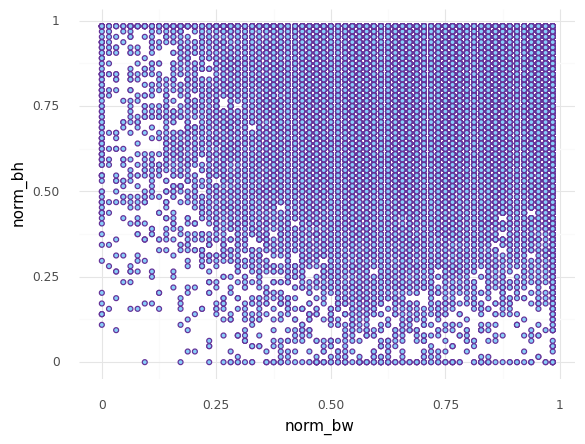

<ggplot: (8761634380889)>


In [ ]:
plot_scatter_bbox(df, x="norm_bw", y="norm_bh")

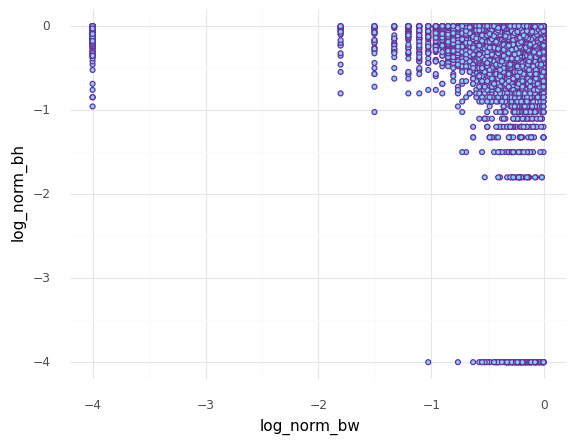

<ggplot: (8761634772041)>


In [ ]:
plot_scatter_bbox(df, "log_norm_bw", "log_norm_bh")

---- KMeans with K = 6 -----
[[    0 16457]
 [    1  3883]
 [    2  9095]
 [    3 15837]
 [    4  6034]
 [    5 48694]]
---- Plot cluster distribution -----


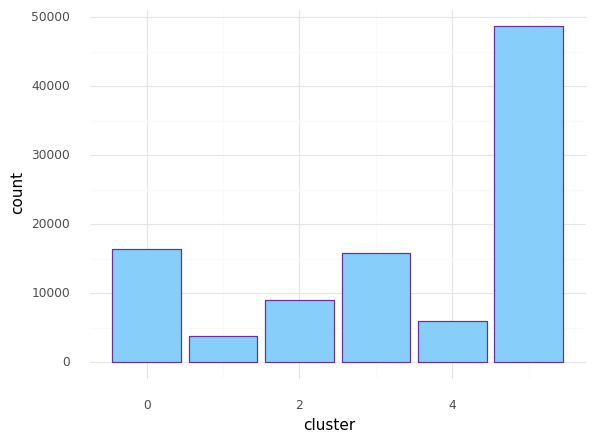

<ggplot: (8728333497649)>
---- Get anchor box Multipliers -----
 ----plot Anchor boxes on sample image---- 


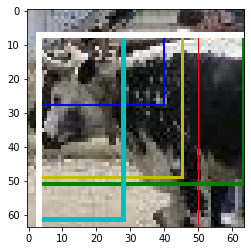

 ----Visualize Anchor Box Clusters---- 


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


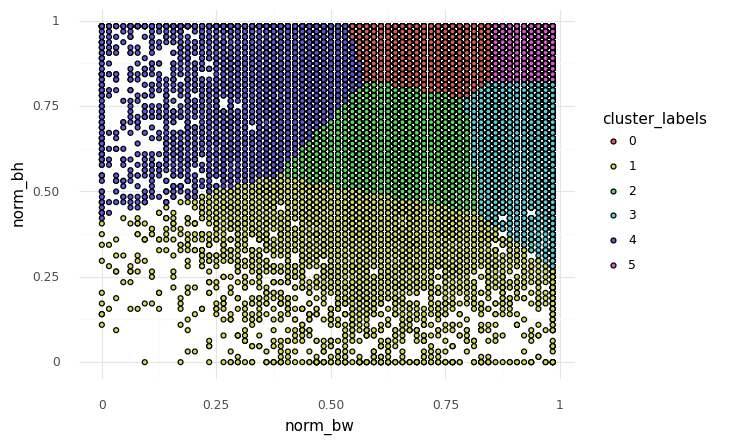

<ggplot: (8728333639713)>


,filename,top_left_x,top_left_y,b_width,b_height,class,x,y,img_width,img_height,norm_w,norm_h,norm_x,norm_y,norm_bw,norm_bh,log_norm_bw,log_norm_bh,cluster_labels,ab_m_w,ab_m_h
0,n02403003_0.JPEG,3,7,63,63,ox,34,38,64,64,1.0,1.0,0.531250,0.593750,0.984375,0.984375,-0.006795,-0.006795,5,1.018506,1.031532
1,n02403003_1.JPEG,3,37,33,55,ox,19,64,64,64,1.0,1.0,0.296875,1.000000,0.515625,0.859375,-0.287582,-0.065767,4,1.338057,1.015118
2,n02403003_2.JPEG,8,1,63,62,ox,39,32,64,64,1.0,1.0,0.609375,0.500000,0.984375,0.968750,-0.006795,-0.013743,5,1.018506,1.015159
3,n02403003_3.JPEG,18,30,53,58,ox,44,59,64,64,1.0,1.0,0.687500,0.921875,0.828125,0.906250,-0.081852,-0.042704,0,1.129252,0.965835
4,n02403003_4.JPEG,0,10,20,59,ox,10,39,64,64,1.0,1.0,0.156250,0.609375,0.312500,0.921875,-0.505011,-0.035281,4,0.810944,1.088945


In [ ]:
sample_image = df.iloc[0]
compute_kmeans(df, sample_image, k=6)

---- KMeans with K = 2 -----
[[    0 74035]
 [    1 25965]]
---- Plot cluster distribution -----


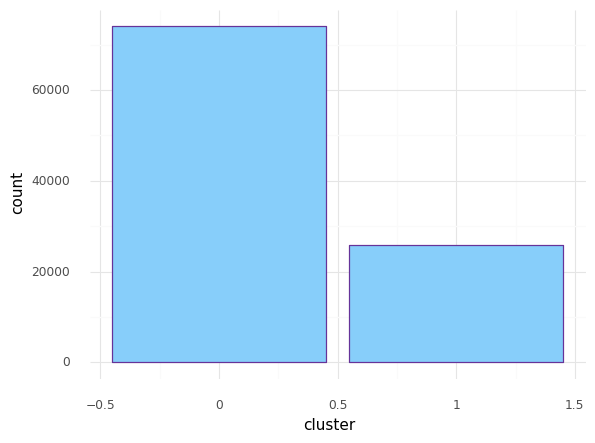

<ggplot: (8728333234685)>
---- Get anchor box Multipliers -----
 ----plot Anchor boxes on sample image---- 


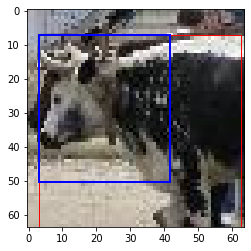

 ----Visualize Anchor Box Clusters---- 


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


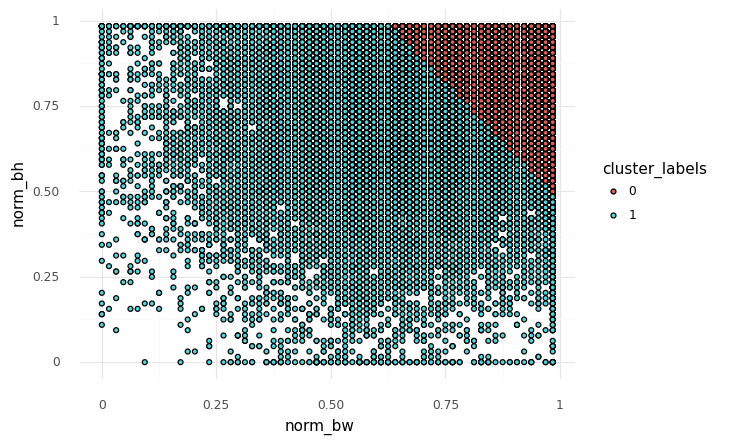

<ggplot: (8728322738281)>
---- KMeans with K = 3 -----
[[    0 66156]
 [    1 16420]
 [    2 17424]]
---- Plot cluster distribution -----


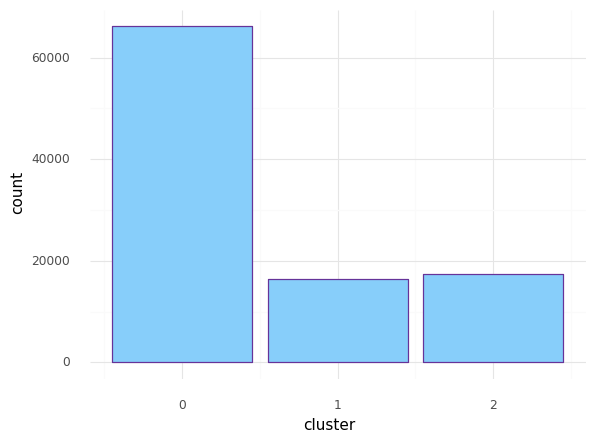

<ggplot: (8728322323321)>
---- Get anchor box Multipliers -----
 ----plot Anchor boxes on sample image---- 


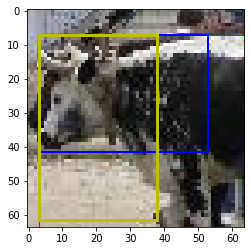

 ----Visualize Anchor Box Clusters---- 


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


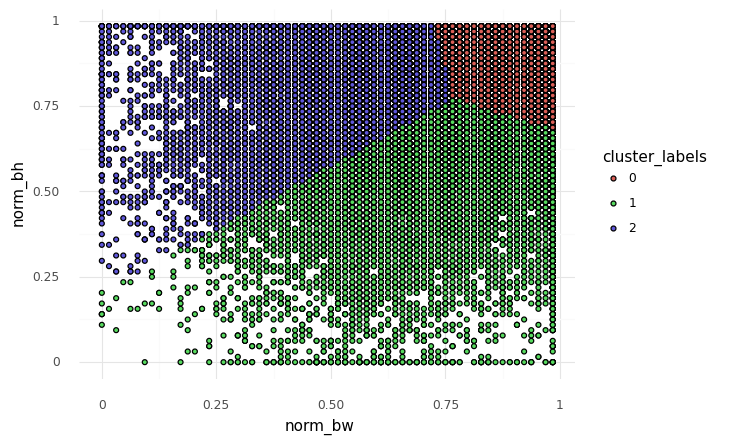

<ggplot: (8728322678069)>
---- KMeans with K = 4 -----
[[    0 56162]
 [    1  8495]
 [    2 16929]
 [    3 18414]]
---- Plot cluster distribution -----


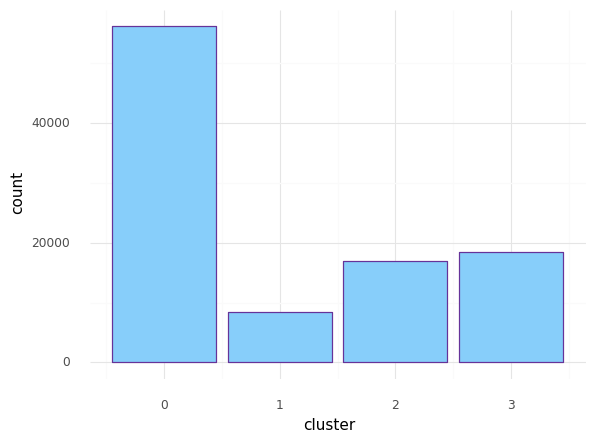

<ggplot: (8728333635977)>
---- Get anchor box Multipliers -----
 ----plot Anchor boxes on sample image---- 


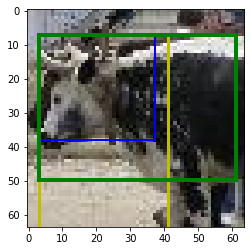

 ----Visualize Anchor Box Clusters---- 


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


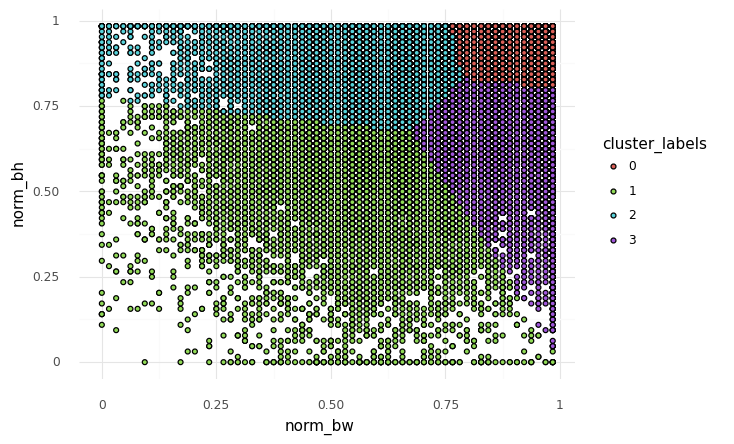

<ggplot: (8728333637329)>
---- KMeans with K = 5 -----
[[    0 18010]
 [    1  8003]
 [    2  6879]
 [    3 16477]
 [    4 50631]]
---- Plot cluster distribution -----


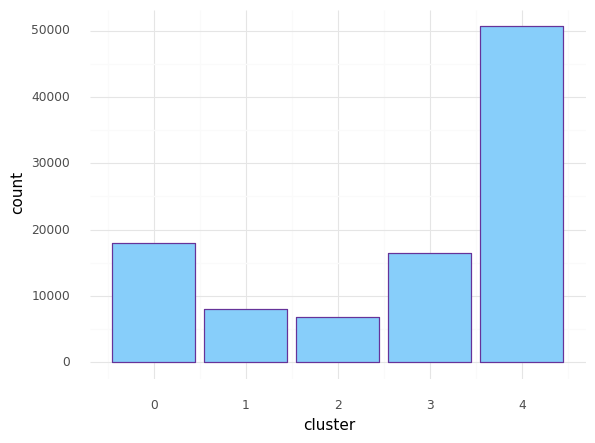

<ggplot: (8728322678209)>
---- Get anchor box Multipliers -----
 ----plot Anchor boxes on sample image---- 


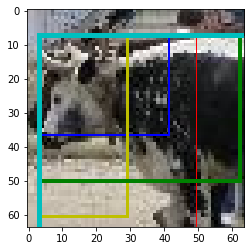

 ----Visualize Anchor Box Clusters---- 


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


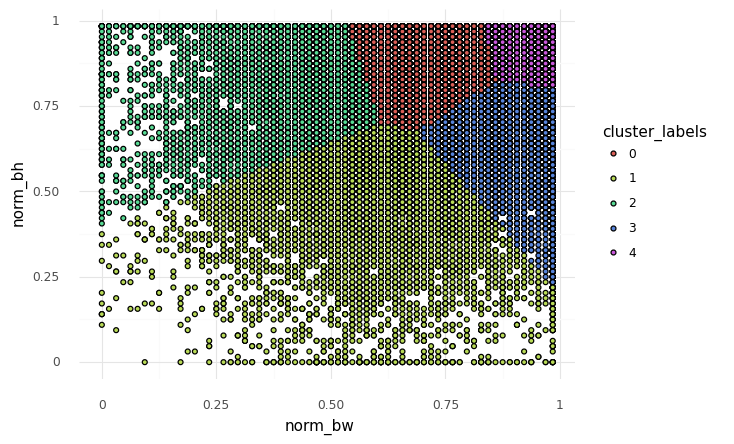

<ggplot: (8728333635205)>
---- KMeans with K = 6 -----
[[    0 16457]
 [    1  3883]
 [    2  9095]
 [    3 15837]
 [    4  6034]
 [    5 48694]]
---- Plot cluster distribution -----


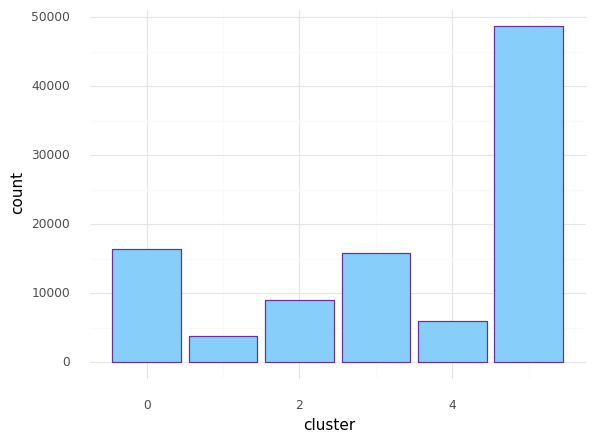

<ggplot: (8728333630429)>
---- Get anchor box Multipliers -----
 ----plot Anchor boxes on sample image---- 


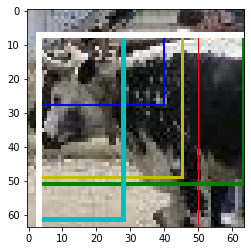

 ----Visualize Anchor Box Clusters---- 


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


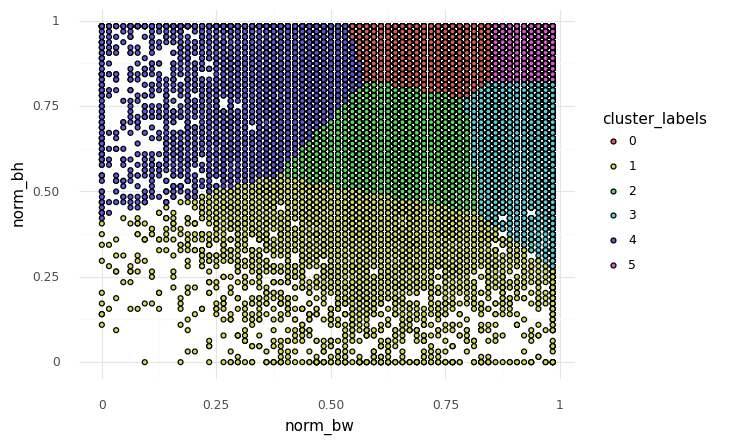

<ggplot: (8728333678385)>


In [ ]:
for k in range(2, 7):
  compute_kmeans(df, sample_image, k=k)